In [15]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [266]:
df = pd.read_csv("crop data.csv")

In [267]:
df.head()

,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,Soil pH,Rainfall,Crop
0,85,58,41,21.77,80.32,7.04,226.66,Rice (Duration - 100-140 days)
1,60,55,44,23.00,82.32,7.84,263.96,Rice (Duration - 100-140 days)
2,74,35,40,26.49,80.16,6.98,242.86,Rice (Duration - 100-140 days)
3,78,42,42,20.13,81.60,7.63,262.72,Rice (Duration - 100-140 days)
4,69,37,42,23.06,83.37,7.07,251.05,Rice (Duration - 100-140 days)


In [268]:
df.tail()

,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,Soil pH,Rainfall,Crop
543,34,27,30,27.73,92.01,6.35,20.21,Ragi (Duration - 90-120 days)
544,36,29,29,28.70,94.31,6.00,22.22,Ragi (Duration - 90-120 days)
545,39,35,35,29.73,90.97,6.34,20.49,Ragi (Duration - 90-120 days)
546,37,26,32,29.54,92.92,6.16,21.97,Ragi (Duration - 90-120 days)
547,33,33,29,28.80,91.78,6.12,25.16,Ragi (Duration - 90-120 days)


In [269]:
df.size

4384

In [270]:
df.shape

(548, 8)

In [271]:
df.columns

Index(['Nitrogen', 'Phosphorous', 'Potassium', 'Temperature', 'Humidity',
       'Soil pH', 'Rainfall', 'Crop'],
      dtype='object')

In [272]:
df['Crop'].unique()

array(['Rice (Duration - 100-140 days) ',
       'Rice (Duration - 100-140 days)', 'Maize (Duration - 65-120 days)',
       'Blackgram (Duration - 90-100 days)',
       'Cocunut (Duration - 3-8 years)',
       'Cotton (Duration - 170-180 days)',
       'Coffee (Duration - 3-4 years)',
       'Sugarcane (Duration - 12-18 months)',
       'Cashew (Duration - 170-180 days)',
       'Groundnut (Duration - 115-125 days)',
       'Ragi (Duration - 90-120 days)'], dtype=object)

In [273]:
df.dtypes

Nitrogen         int64
Phosphorous      int64
Potassium        int64
Temperature    float64
Humidity       float64
Soil pH        float64
Rainfall       float64
Crop            object
dtype: object

In [274]:
df['Crop'].value_counts()

Coffee (Duration - 3-4 years)          84
Groundnut (Duration - 115-125 days)    61
Sugarcane (Duration - 12-18 months)    57
Maize (Duration - 65-120 days)         56
Cashew (Duration - 170-180 days)       51
Blackgram (Duration - 90-100 days)     50
Cocunut (Duration - 3-8 years)         50
Cotton (Duration - 170-180 days)       50
Ragi (Duration - 90-120 days)          49
Rice (Duration - 100-140 days)         39
Rice (Duration - 100-140 days)          1
Name: Crop, dtype: int64

<Axes: >

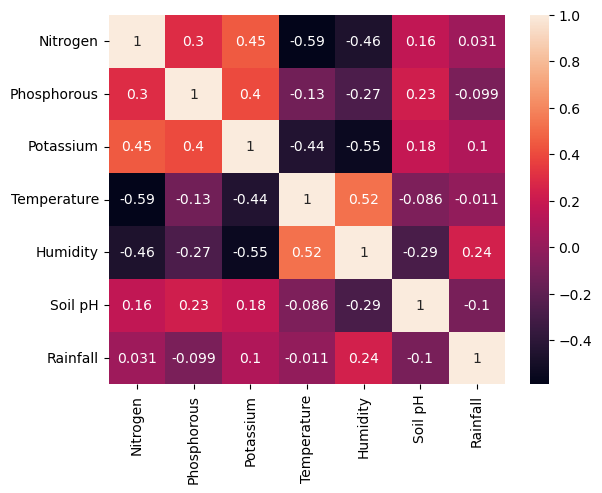

In [276]:
sns.heatmap(df.corr(),annot=True)

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
x = df.iloc[:,df.columns!='Crop'] #data
y = df.iloc[:,df.columns=='Crop'] #outcome or Label

In [279]:
features = df[['Nitrogen', 'Phosphorous','Potassium','Temperature', 'Humidity', 'Soil pH', 'Rainfall']]
target = df['Crop']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['Crop']

In [280]:
# Splitting into train and test data
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2)

In [281]:
from sklearn.ensemble import RandomForestClassifier

In [282]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=20, random_state=0)

In [283]:
# model=RandomForestClassifier()
predicted_values = RF.predict(xtest)

In [284]:
# model.fit(xtrain,ytrain.values.ravel())                                   #to train the alg

In [285]:
acc = []
model = []

In [286]:
x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(ytest,predicted_values))

RF's Accuracy is:  1.0
                                     precision    recall  f1-score   support

 Blackgram (Duration - 90-100 days)       1.00      1.00      1.00        11
   Cashew (Duration - 170-180 days)       1.00      1.00      1.00        12
     Cocunut (Duration - 3-8 years)       1.00      1.00      1.00        12
      Coffee (Duration - 3-4 years)       1.00      1.00      1.00        18
   Cotton (Duration - 170-180 days)       1.00      1.00      1.00        10
Groundnut (Duration - 115-125 days)       1.00      1.00      1.00         9
     Maize (Duration - 65-120 days)       1.00      1.00      1.00        13
      Ragi (Duration - 90-120 days)       1.00      1.00      1.00         6
     Rice (Duration - 100-140 days)       1.00      1.00      1.00         7
Sugarcane (Duration - 12-18 months)       1.00      1.00      1.00        12

                           accuracy                           1.00       110
                          macro avg       1.00     

In [287]:
from sklearn.metrics import accuracy_score

In [289]:
acc=accuracy_score(predict_output,ytest)
print('The accuracy score for RF:',acc)

The accuracy score for RF: 0.0


In [290]:
from sklearn.tree import DecisionTreeClassifier

In [291]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

In [292]:
DecisionTree.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [293]:
predicted_values = DecisionTree.predict(xtest)

In [294]:
acc = []
model = []

In [295]:
x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)
print(classification_report(ytest,predicted_values))


DecisionTrees's Accuracy is:  100.0
                                     precision    recall  f1-score   support

 Blackgram (Duration - 90-100 days)       1.00      1.00      1.00        11
   Cashew (Duration - 170-180 days)       1.00      1.00      1.00        12
     Cocunut (Duration - 3-8 years)       1.00      1.00      1.00        12
      Coffee (Duration - 3-4 years)       1.00      1.00      1.00        18
   Cotton (Duration - 170-180 days)       1.00      1.00      1.00        10
Groundnut (Duration - 115-125 days)       1.00      1.00      1.00         9
     Maize (Duration - 65-120 days)       1.00      1.00      1.00        13
      Ragi (Duration - 90-120 days)       1.00      1.00      1.00         6
     Rice (Duration - 100-140 days)       1.00      1.00      1.00         7
Sugarcane (Duration - 12-18 months)       1.00      1.00      1.00        12

                           accuracy                           1.00       110
                          macro avg   

In [296]:
#acc.append(x)

In [297]:
print(ytest)

                                    Crop
221     Cotton (Duration - 170-180 days)
82        Maize (Duration - 65-120 days)
213     Cotton (Duration - 170-180 days)
369  Sugarcane (Duration - 12-18 months)
330  Sugarcane (Duration - 12-18 months)
..                                   ...
89        Maize (Duration - 65-120 days)
541        Ragi (Duration - 90-120 days)
271        Coffee (Duration - 3-4 years)
232     Cotton (Duration - 170-180 days)
215     Cotton (Duration - 170-180 days)

[110 rows x 1 columns]


In [298]:
from sklearn.model_selection import cross_val_score

In [299]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target, cv=5)

In [300]:
score

array([0.99090909, 0.99090909, 0.99090909, 1.        , 1.        ])

In [301]:
import pickle

In [302]:
# Dump the trained RF classifier with Pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [303]:
# Open the file to save as pkl file
pickled_model = pickle.load(open('model.pkl', 'rb'))

In [304]:
acc=accuracy_score(predict_output,ytest)
print('The accuracy score:',acc)

The accuracy score: 0.0


In [305]:
# plt.figure(figsize=[10,5],dpi = 100)
# plt.title('Accuracy Comparison')
# plt.xlabel('Accuracy')
# plt.ylabel('Algorithm')
# sns.barplot(x = acc,y = model,palette='dark')

In [306]:
# accuracy_models = dict(zip(model, acc))
# for k, v in accuracy_models.items():
#     print (k, '-->', v)

In [307]:
# pip install numpy

In [308]:
data = np.array([[85,58,41,21.77,80.32,7.04,226.66]])
prediction = RF.predict(data)
print(prediction)

['Rice (Duration - 100-140 days) ']


In [309]:
data = np.array([[3,2,1,30,70,10,190.66]])
prediction = RF.predict(data)
print(prediction)

['Cashew (Duration - 170-180 days)']


In [310]:
data = np.array([[72,60,25,18.53,69,5.77,88.10]])
prediction = RF.predict(data)
print(prediction)

['Maize (Duration - 65-120 days)']


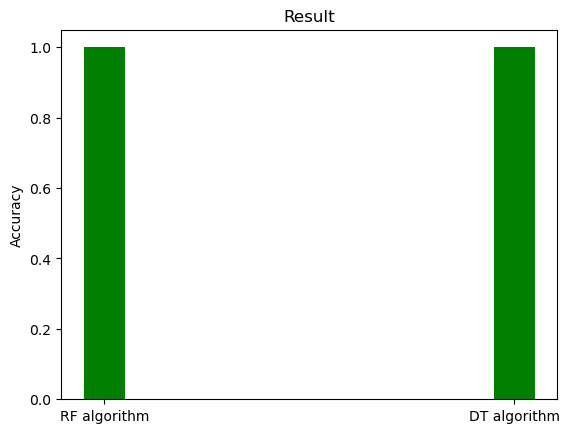

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# create data for the algorithms
algorithm1=[0.7,0.8,0.9,1.0]
algorithm1_time = 1.0
algorithm2_time = 1.0

# set the position and width of the bars
pos = np.arange(2)
width = 0.1
# plt.figure(figsize=[5,5],dpi = 70)
# plot the bars
plt.bar(pos, [algorithm1_time, algorithm2_time], width, color='green')

# add labels and title
plt.xticks(pos, ['RF algorithm', 'DT algorithm'])
plt.ylabel('Accuracy')
plt.title('Result')

# show the plot
plt.show()
